<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.613972,98.567336,76.399605,-0.004054,254.576858,254.576081,0.000778
1,0.0,1.0,61.930400,23.078190,80.336147,-0.028800,175.315936,175.337748,-0.021812
2,0.0,2.0,30.487472,76.365030,58.877559,-0.010929,175.719132,175.731483,-0.012351
3,0.0,3.0,60.501696,87.670322,85.918676,0.002036,244.092729,244.085986,0.006744
4,0.0,4.0,84.106437,76.843317,95.199632,-0.009893,266.139493,266.140062,-0.000569
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,60.663230,42.484228,90.605227,0.008346,203.761029,203.745925,0.015104
19996,999.0,16.0,66.351463,31.956731,81.300978,-0.009693,189.599478,189.600146,-0.000667
19997,999.0,17.0,32.360118,89.337419,83.289609,0.002206,214.989352,214.990758,-0.001406
19998,999.0,18.0,88.865060,30.786715,85.211618,-0.023147,214.840246,214.851441,-0.011195


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.613972  98.567336  76.399605  ...  254.576858  254.576081  0.000778
      1.0    61.930400  23.078190  80.336147  ...  175.315936  175.337748 -0.021812
      2.0    30.487472  76.365030  58.877559  ...  175.719132  175.731483 -0.012351
      3.0    60.501696  87.670322  85.918676  ...  244.092729  244.085986  0.006744
      4.0    84.106437  76.843317  95.199632  ...  266.139493  266.140062 -0.000569
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   60.663230  42.484228  90.605227  ...  203.761029  203.745925  0.015104
      16.0   66.351463  31.956731  81.300978  ...  189.599478  189.600146 -0.000667
      17.0   32.360118  89.337419  83.289609  ...  214.989352  214.990758 -0.001406
      18.0   88.865060  30.786715  85.211618  ...  214.840246  214.851441 -0.011195
      19.0   61.594451  28.710004  24.389824  ...  124.684465  124.685255 -0.000790

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.613972  98.567336  76.399605  ...  254.576858  254.576081  0.000778
      1.0    61.930400  23.078190  80.336147  ...  175.315936  175.337748 -0.021812
      2.0    30.487472  76.365030  58.877559  ...  175.719132  175.731483 -0.012351
      3.0    60.501696  87.670322  85.918676  ...  244.092729  244.085986  0.006744
      4.0    84.106437  76.843317  95.199632  ...  266.139493  266.140062 -0.000569
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   60.663230  42.484228  90.605227  ...  203.761029  203.745925  0.015104
      16.0   66.351463  31.956731  81.300978  ...  189.599478  189.600146 -0.000667
      17.0   32.360118  89.337419  83.289609  ...  214.989352  214.990758 -0.001406
      18.0   88.865060  30.786715  85.211618  ...  214.840246  214.851441 -0.011195
      19.0   61.594451  28.710004  24.389824  ...  124.684465  124.685255 -0.000790

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.613972,98.567336,76.399605,-0.004054,254.576858,254.576081,0.000778
1,0.0,1.0,61.930400,23.078190,80.336147,-0.028800,175.315936,175.337748,-0.021812
2,0.0,2.0,30.487472,76.365030,58.877559,-0.010929,175.719132,175.731483,-0.012351
3,0.0,3.0,60.501696,87.670322,85.918676,0.002036,244.092729,244.085986,0.006744
4,0.0,4.0,84.106437,76.843317,95.199632,-0.009893,266.139493,266.140062,-0.000569
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,60.663230,42.484228,90.605227,0.008346,203.761029,203.745925,0.015104
19996,999.0,16.0,66.351463,31.956731,81.300978,-0.009693,189.599478,189.600146,-0.000667
19997,999.0,17.0,32.360118,89.337419,83.289609,0.002206,214.989352,214.990758,-0.001406
19998,999.0,18.0,88.865060,30.786715,85.211618,-0.023147,214.840246,214.851441,-0.011195


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    69.613972  98.567336  76.399605  ...  254.576858  254.576081  0.000778
      1.0    61.930400  23.078190  80.336147  ...  175.315936  175.337748 -0.021812
      2.0    30.487472  76.365030  58.877559  ...  175.719132  175.731483 -0.012351
      3.0    60.501696  87.670322  85.918676  ...  244.092729  244.085986  0.006744
      4.0    84.106437  76.843317  95.199632  ...  266.139493  266.140062 -0.000569
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   60.663230  42.484228  90.605227  ...  203.761029  203.745925  0.015104
      16.0   66.351463  31.956731  81.300978  ...  189.599478  189.600146 -0.000667
      17.0   32.360118  89.337419  83.289609  ...  214.989352  214.990758 -0.001406
      18.0   88.865060  30.786715  85.211618  ...  214.840246  214.851441 -0.011195
      19.0   61.594451  28.710004  24.389824  ...  124.684465  124.685255 -0.000790

[20000 rows x 7 columns]

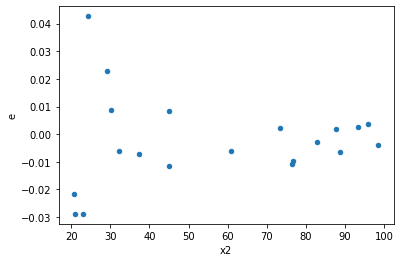

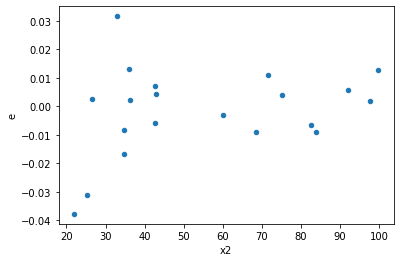

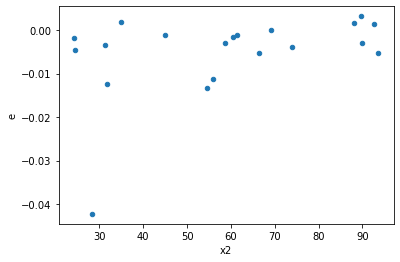

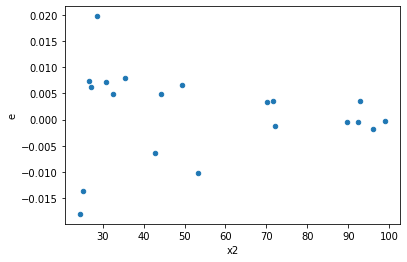

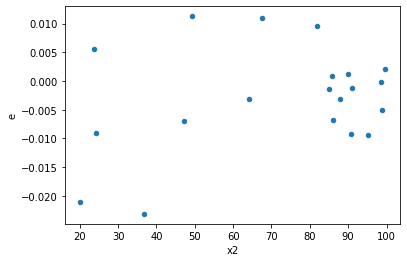

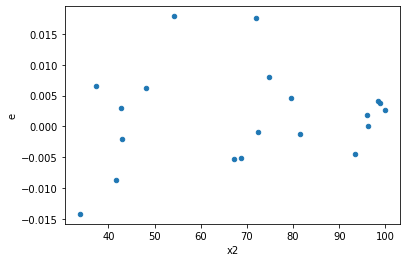

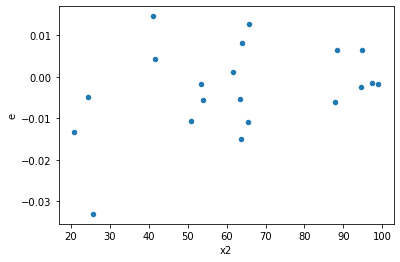

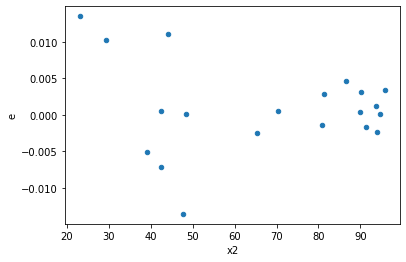

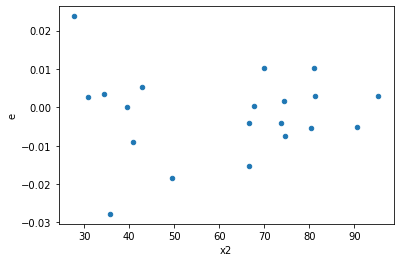

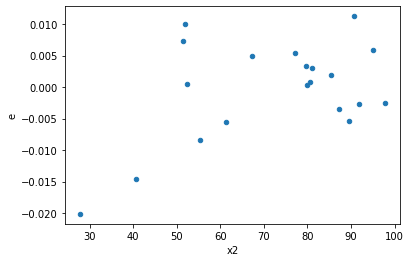

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid


In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,5.0,9.0,0.00014858849097298387,0.0028402432525597575,3.714712274324597e-05,0.0003550304065699697,10.61934815917639,0.018097663442229184,0.9909511682788854,Reject001=1 : Homoscedasticity
4.0,5.0,9.0,0.00011089290702674734,0.0008770252107605746,2.7723226756686834e-05,0.00010962815134507183,4.393754670736498,0.11772160054430136,0.9411391997278493,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,0.00022458480439875526,0.00044486586878357505,4.491696087975105e-05,6.355226696908215e-05,1.485627678510606,0.6477111461401657,0.6761444269299172,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,0.00030167977761335956,0.0006315780193666907,6.0335955522671916e-05,9.022543133809867e-05,1.570153353573811,0.5997303072812254,0.7001348463593873,Reject001=1 : Homoscedasticity
7.0,5.0,9.0,2.103041542272749e-05,0.00013352139985548897,5.257603855681872e-06,1.669017498193612e-05,3.527203528043824,0.1787026298769312,0.9106486850615344,Reject001=1 : Homoscedasticity
8.0,9.0,5.0,0.00040358337060272613,0.0011182605734745455,5.044792132534077e-05,0.00027956514336863636,4.987492495659794,0.03655857338392554,0.9817207133080372,Reject001=1 : Homoscedasticity
9.0,9.0,5.0,0.0001699816352644926,0.0002274588097554298,2.1247704408061576e-05,5.686470243885745e-05,2.4086475984461746,0.23822073317956138,0.8808896334102193,Reject001=1 : Homoscedasticity
12.0,8.0,6.0,0.00010005083739878567,0.0005314251324494024,1.4292976771255096e-05,0.00010628502648988048,7.082068093459754,0.014428905909838141,0.9927855470450809,Reject001=1 : Homoscedasticity
13.0,10.0,4.0,0.0002386522305288158,0.0013974884171073635,2.6516914503201754e-05,0.00046582947236912116,14.639381475827284,0.000696019510284307,0.9996519902448578,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,8.0,0.00420801879991799,0.00036802929555940087,0.0008416037599835981,5.257561365134298e-05,0.06559428196350502,0.0010990313415316978,Reject001=0 : Heteroscedasticity
1.0,5.0,9.0,0.00014858849097298387,0.0028402432525597575,3.714712274324597e-05,0.0003550304065699697,10.61934815917639,0.018097663442229184,Reject001=1 : Homoscedasticity
2.0,4.0,10.0,0.0011836182931796466,0.00017196545999101733,0.0003945394310598822,1.910727333233526e-05,0.05811517479306713,0.00035255907560900697,Reject001=0 : Heteroscedasticity
3.0,6.0,8.0,0.0008307343062533768,0.00020032485426557968,0.00016614686125067537,2.861783632365424e-05,0.1808564297492247,0.03053568516552691,Reject001=1 : Homoscedasticity
4.0,5.0,9.0,0.00011089290702674734,0.0008770252107605746,2.7723226756686834e-05,0.00010962815134507183,4.393754670736498,0.11772160054430136,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,0.00022458480439875526,0.00044486586878357505,4.491696087975105e-05,6.355226696908215e-05,1.485627678510606,1.3522888538598343,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,0.00030167977761335956,0.0006315780193666907,6.0335955522671916e-05,9.022543133809867e-05,1.570153353573811,1.4002696927187746,Reject001=1 : Homoscedasticity
7.0,5.0,9.0,2.103041542272749e-05,0.00013352139985548897,5.257603855681872e-06,1.669017498193612e-05,3.527203528043824,0.1787026298769312,Reject001=1 : Homoscedasticity
8.0,9.0,5.0,0.00040358337060272613,0.0011182605734745455,5.044792132534077e-05,0.00027956514336863636,4.987492495659794,0.03655857338392554,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      807
Reject001=0 : Heteroscedasticity    193
Name: Result_test, dtype: int64